In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
df = pd.read_excel("./AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

In [4]:
df.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [5]:
cdf = df[['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']]
cdf.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [6]:
df2 = pd.DataFrame()
s = pd.Series(df['Date'])
df2['Date'] = s
s = pd.Series(df['Time'])
df2['Time'] = s
for key, value in cdf.iteritems():
    s = pd.Series(cdf[key])
    s[s<0] = 0
for key, value in cdf.iteritems():
    s = pd.Series(cdf[key])
    m = pd.Series.mean(s)
    s[s == 0] = pd.Series.mean(s)
    df2[key] = s
df2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,21.373731,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,21.373731,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,21.373731,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,21.373731,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [7]:
df2 = df2[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]
df2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2004-03-10,18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,1692.00,1267.50,13.600,48.875001
1,2004-03-10,19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,1558.75,972.25,13.300,47.700000
2,2004-03-10,20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,1554.50,1074.00,11.900,53.975000
3,2004-03-10,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,1583.75,1203.25,11.000,60.000000
4,2004-03-10,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,1490.00,1110.00,11.150,59.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,21.373731,13.529605,1101.25,471.7,538.50,1374.25,1728.50,21.850,29.250000
9353,2005-04-04,11:00:00,2.4,1162.50,21.373731,11.355157,1027.00,353.3,603.75,1263.50,1269.00,24.325,23.725000
9354,2005-04-04,12:00:00,2.4,1142.00,21.373731,12.374538,1062.50,293.0,603.25,1240.75,1092.00,26.900,18.350000
9355,2005-04-04,13:00:00,2.1,1002.50,21.373731,9.547187,960.50,234.5,701.50,1041.00,769.75,28.325,13.550000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 950.4+ KB


In [9]:
duplicate = df2[df2.duplicated()]
duplicate

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH


# Visualization

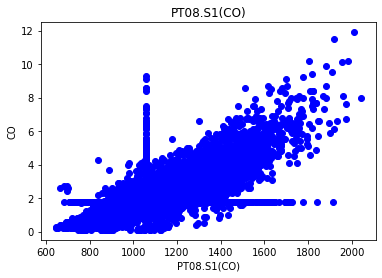

In [10]:
plt.scatter(df2['PT08.S1(CO)'],df2['CO(GT)'], color = 'blue')
plt.title('PT08.S1(CO)')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('CO')
plt.show()

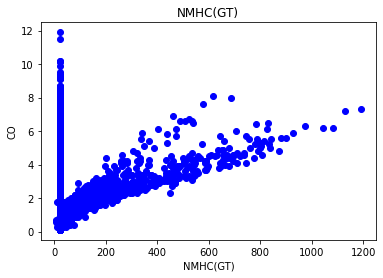

In [11]:
plt.scatter(df2['NMHC(GT)'],df2['CO(GT)'], color = 'blue')
plt.title('NMHC(GT)')
plt.xlabel('NMHC(GT)')
plt.ylabel('CO')
plt.show()

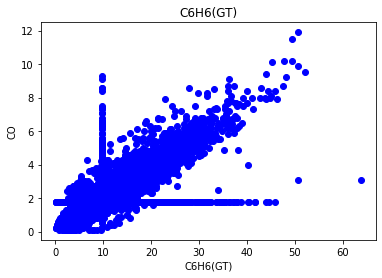

In [12]:
plt.scatter(df2['C6H6(GT)'],df2['CO(GT)'], color = 'blue')
plt.title('C6H6(GT)')
plt.xlabel('C6H6(GT)')
plt.ylabel('CO')
plt.show()

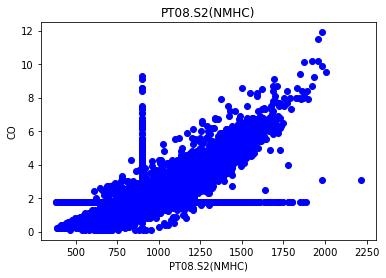

In [13]:
plt.scatter(df2['PT08.S2(NMHC)'],df2['CO(GT)'], color = 'blue')
plt.title('PT08.S2(NMHC)')
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('CO')
plt.show()

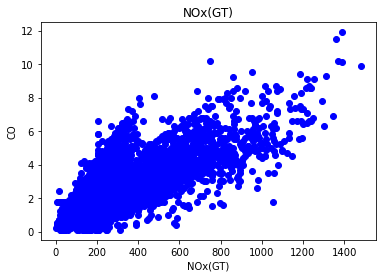

In [14]:
plt.scatter(df2['NOx(GT)'],df2['CO(GT)'], color = 'blue')
plt.title('NOx(GT)')
plt.xlabel('NOx(GT)')
plt.ylabel('CO')
plt.show()

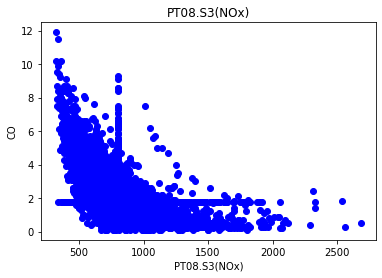

In [15]:
plt.scatter(df2['PT08.S3(NOx)'],df2['CO(GT)'], color = 'blue')
plt.title('PT08.S3(NOx)')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('CO')
plt.show()

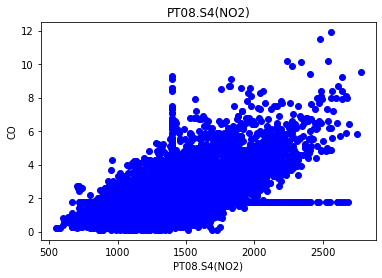

In [16]:
plt.scatter(df2['PT08.S4(NO2)'],df2['CO(GT)'], color = 'blue')
plt.title('PT08.S4(NO2)')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('CO')
plt.show()

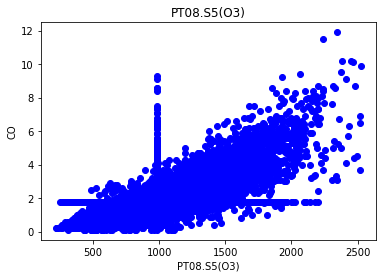

In [17]:
plt.scatter(df2['PT08.S5(O3)'],df2['CO(GT)'], color = 'blue')
plt.title('PT08.S5(O3)')
plt.xlabel('PT08.S5(O3)')
plt.ylabel('CO')
plt.show()

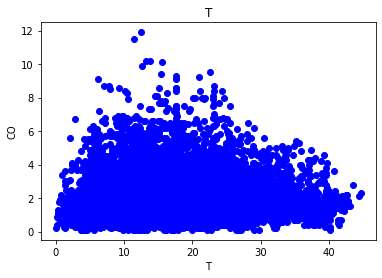

In [18]:
plt.scatter(df2['T'],df2['CO(GT)'], color = 'blue')
plt.title('T')
plt.xlabel('T')
plt.ylabel('CO')
plt.show()

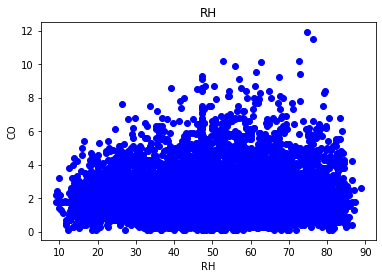

In [19]:
plt.scatter(df2['RH'],df2['CO(GT)'], color = 'blue')
plt.title('RH')
plt.xlabel('RH')
plt.ylabel('CO')
plt.show()

In [20]:
df2["Time_in_Hours"] = (df2["Time"].astype(str).str.slice(0,2)).astype(int)

<ipython-input-20-8b1a411cd97f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Time_in_Hours"] = (df2["Time"].astype(str).str.slice(0,2)).astype(int)


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  Time_in_Hours  9357 non-null   int32         
dtypes: datetime64[ns](1), float64(11), int32(1), object(1)
memory usage: 987

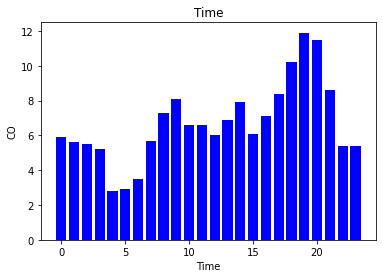

In [22]:
plt.bar(df2['Time_in_Hours'],df2['CO(GT)'], color = 'blue')
plt.title('Time')
plt.xlabel('Time')
plt.ylabel('CO')
plt.show()

In [23]:
df2['Month'] = df['Date'].dt.month
df2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,Time_in_Hours,Month
0,2004-03-10,18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,1692.00,1267.50,13.600,48.875001,18,3
1,2004-03-10,19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,1558.75,972.25,13.300,47.700000,19,3
2,2004-03-10,20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,1554.50,1074.00,11.900,53.975000,20,3
3,2004-03-10,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,1583.75,1203.25,11.000,60.000000,21,3
4,2004-03-10,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,1490.00,1110.00,11.150,59.575001,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,21.373731,13.529605,1101.25,471.7,538.50,1374.25,1728.50,21.850,29.250000,10,4
9353,2005-04-04,11:00:00,2.4,1162.50,21.373731,11.355157,1027.00,353.3,603.75,1263.50,1269.00,24.325,23.725000,11,4
9354,2005-04-04,12:00:00,2.4,1142.00,21.373731,12.374538,1062.50,293.0,603.25,1240.75,1092.00,26.900,18.350000,12,4
9355,2005-04-04,13:00:00,2.1,1002.50,21.373731,9.547187,960.50,234.5,701.50,1041.00,769.75,28.325,13.550000,13,4


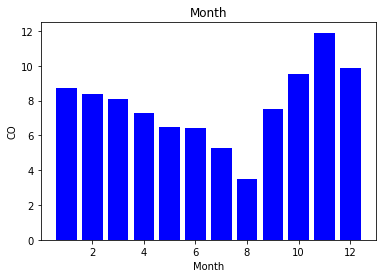

In [24]:
plt.bar(df2['Month'],df2['CO(GT)'], color = 'blue')
plt.title('Month')
plt.xlabel('Month')
plt.ylabel('CO')
plt.show()

# Multiple Linear Regression

In [25]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]
msk

array([ True, False,  True, ...,  True, False, False])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

NameError: name 'x' is not defined

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train)
y = np.asanyarray(y_train)
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

NameError: name 'x_train' is not defined

In [28]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

NameError: name 'x_test' is not defined

In [29]:
x_test.shape

NameError: name 'x_test' is not defined

In [30]:
li = []
for i in range(3119) :
    li.append(x_test[i][0])
plt.scatter(li,y_test,color='r')
plt.plot(li,regr.predict(x_test))
plt.title("PT08.S1(CO) Vs CO(GT)(testing set)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel("CO(GT)")
plt.show()

NameError: name 'x_test' is not defined

In [31]:
li = []
for i in range(6238) :
    li.append(x_train[i][1])
plt.scatter(li,y_train,color='r')
plt.plot(li,regr.predict(x_test))
plt.title("NMHC(GT) Vs CO(GT)(training set)")
plt.xlabel("NMHC(GT)")
plt.ylabel("CO(GT)")
plt.show()

NameError: name 'x_train' is not defined

In [32]:
li1 = []
for i in range(3119) :
    li1.append(X_test[i][0])
plt.scatter(li1,Y_test,color='r')
plt.plot(li1,regr.predict(X_test))
plt.title("PT08.S1(CO) Vs CO(GT)(testing set)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel("CO(GT)")
plt.show()

NameError: name 'X_test' is not defined